# Integración en Varias Variables

Para funciones de varias variables, la integración se puede realizar mediante:

Integrales dobles sobre una superficie dada como $$\int_a^b \int_{y_{min}(x)}^{y_{max}(x)} f(x,y) dx dy$$

Integrales triples sobre un volumen dada como
$$\int_a^b \int_{y_{min}(x)}^{y_{max}(x)} \int_{z_{min}(x,y)}^{z_{max}(x,y)} f(x,y,z) dx dy dz$$.

En el caso de la formula de Simpson en tres dimensiones, la formula de Simpson tiene la forma:

$$\iiint_Vf(x,y,z)dzdydx\approx\frac{h_xh_yh_z}{27}\sum_{i=0}^n\sum_{j=0}^m\sum_{k=0}^pw_{ijk}f(x_i,y_j,z_k)$$

donde $h_x=\frac{b-a}{n}$, $h_y=\frac{d-c}{m}$ y $h_z=\frac{f-e}{p}$; y $w_{ijk}$ son los pesos de Simpson definidos como $w=[1,4,2,4,...2,4,1]$.

In [10]:
import numpy as np
from numpy import sqrt, arctan2, cos, sin, pi
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def simpson_3d(f, a, b, c, d, e, f_limits, n=100):
    """
    Integración triple usando la regla de Simpson compuesta
    
    Parámetros:
    f: función a integrar f(x,y,z)
    a, b: límites en x
    c, d: límites en y (pueden ser funciones de x)
    e, f_limits: límites en z (pueden ser funciones de x,y)
    n: número de intervalos (debe ser par)
    """
    if n % 2 != 0:
        n += 1  # Asegurar que n es par
    
    hx = (b - a) / n
    integral = 0.0
    
    for i in range(n + 1):
        x = a + i * hx
        # Peso de Simpson para x
        wx = (hx / 3) * (1 if i == 0 or i == n else 4 if i % 2 == 1 else 2)
        
        # Calcular límites en y
        y_min = c(x) if callable(c) else c
        y_max = d(x) if callable(d) else d
        hy = (y_max - y_min) / n
        
        for j in range(n + 1):
            y = y_min + j * hy
            # Peso de Simpson para y
            wy = (hy / 3) * (1 if j == 0 or j == n else 4 if j % 2 == 1 else 2)
            
            # Calcular límites en z
            z_min = e(x,y) if callable(e) else e
            z_max = f_limits(x,y) if callable(f_limits) else f_limits
            hz = (z_max - z_min) / n
            
            for k in range(n + 1):
                z = z_min + k * hz
                # Peso de Simpson para z
                wz = (hz / 3) * (1 if k == 0 or k == n else 4 if k % 2 == 1 else 2)
                
                # Sumar contribución a la integral
                integral += wx * wy * wz * f(x,y,z)
    
    return integral

## Ejemplo
Calcular la masa total de una intrusión magmática con densidad variable y donde la densidad esta descrita como $\rho(x,y,z)=2800+100e^{-0.01(x^2+y^2+z^2)}$ con unidades de $kg/m^3$. La forma de la intrusión es elíptica con dimensiones aproximadas de $\frac{x^2}{100}+\frac{y^2}{100}+\frac{z^2}{25}\leq 1$.

Masa total de la intrusión magmática: 5.99e+06 kg


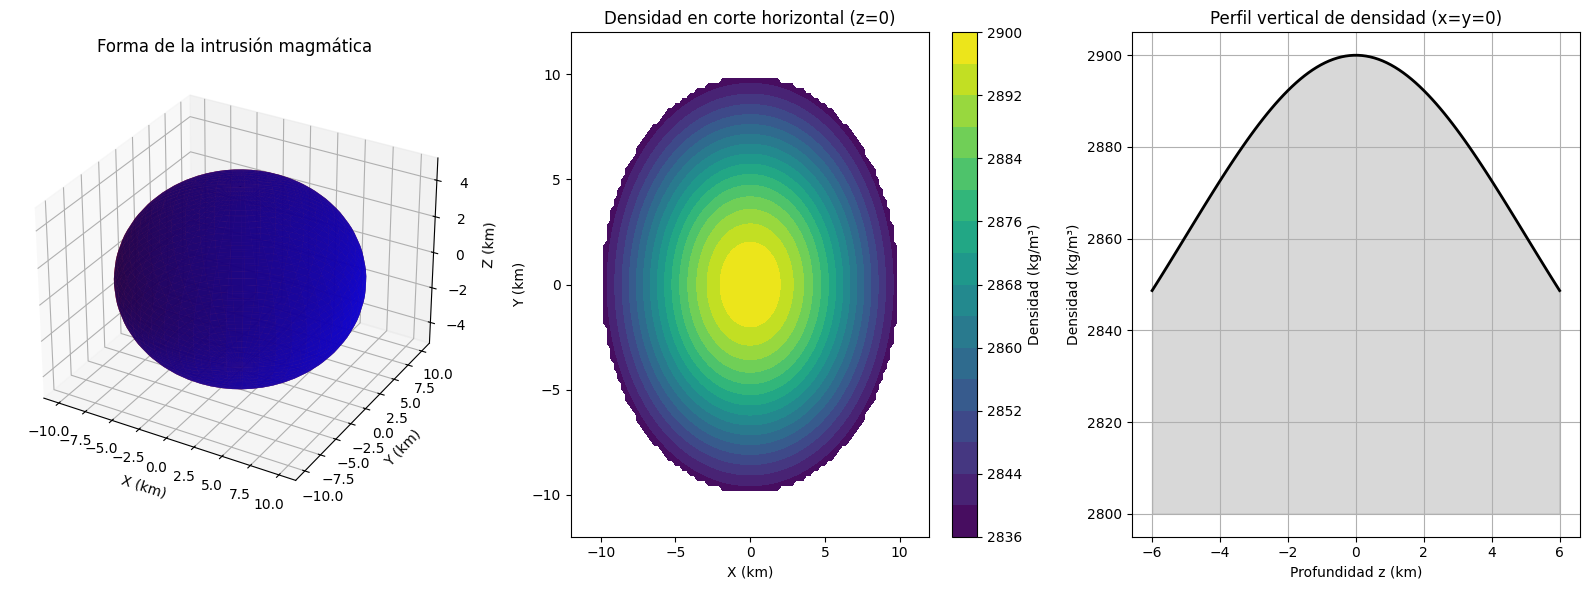

In [7]:
# Función de densidad de la intrusión magmática
def densidad_intrusion(x, y, z):
    """Modelo de densidad de una intrusión magmática lenticular"""
    return 2800 + 100 * np.exp(-0.01*(x**2 + y**2 + 2*z**2))

# Límites de integración para un elipsoide
def y_min(x):
    return -sqrt(100 - x**2) if abs(x) <= 10 else 0

def y_max(x):
    return sqrt(100 - x**2) if abs(x) <= 10 else 0

def z_min(x, y):
    r_xy = sqrt(x**2 + y**2)
    return -0.5*sqrt(100 - r_xy**2) if r_xy <= 10 else 0

def z_max(x, y):
    r_xy = sqrt(x**2 + y**2)
    return 0.5*sqrt(100 - r_xy**2) if r_xy <= 10 else 0

# Cálculo de la masa
masa = simpson_3d(densidad_intrusion, -10, 10, y_min, y_max, z_min, z_max, n=50)
print(f"Masa total de la intrusión magmática: {masa:.2e} kg")

# Visualización
fig = plt.figure(figsize=(16, 6))

# 1. Gráfica 3D de la forma de la intrusión
ax1 = fig.add_subplot(131, projection='3d')

# Crear malla para la superficie
u = np.linspace(0, 2*pi, 50)
v = np.linspace(0, pi, 50)
x = 10 * np.outer(cos(u), sin(v))
y = 10 * np.outer(sin(u), sin(v))
z = 5 * np.outer(np.ones_like(u), cos(v))

# Graficar superficie
ax1.plot_surface(x, y, z, color='red', alpha=0.6)
ax1.plot_surface(x, y, -z, color='blue', alpha=0.6)
ax1.set_title('Forma de la intrusión magmática')
ax1.set_xlabel('X (km)')
ax1.set_ylabel('Y (km)')
ax1.set_zlabel('Z (km)')

# 2. Mapa de densidad en corte horizontal (z=0)
ax2 = fig.add_subplot(132)
x_vals = np.linspace(-12, 12, 100)
y_vals = np.linspace(-12, 12, 100)
X, Y = np.meshgrid(x_vals, y_vals)
Z = np.zeros_like(X)
D = densidad_intrusion(X, Y, Z)

# Aplicar máscara para mostrar solo dentro del elipsoide
mask = (X**2 + Y**2) > 100
D_masked = np.ma.masked_where(mask, D)

contour = ax2.contourf(X, Y, D_masked, levels=20, cmap='viridis')
plt.colorbar(contour, label='Densidad (kg/m³)')
ax2.set_title('Densidad en corte horizontal (z=0)')
ax2.set_xlabel('X (km)')
ax2.set_ylabel('Y (km)')

# 3. Perfil vertical de densidad
ax3 = fig.add_subplot(133)
z_vals = np.linspace(-6, 6, 100)
rho_vals = densidad_intrusion(0, 0, z_vals)
ax3.plot(z_vals, rho_vals, 'k-', linewidth=2)
ax3.fill_between(z_vals, 2800, rho_vals, color='gray', alpha=0.3)
ax3.set_title('Perfil vertical de densidad (x=y=0)')
ax3.set_xlabel('Profundidad z (km)')
ax3.set_ylabel('Densidad (kg/m³)')
ax3.grid(True)

plt.tight_layout()
plt.show()

### Ejercicio 1

Obten la masa total de la intrusion si la geometría de la intrusión es mas oblada de prolada. Usa la función $\frac{x^2}{25}+\frac{y^2}{25}+\frac{z^2}{100}\leq 1$. 

## Ejemplo
Calcular el flujo total de energía solar a través de una región de la magnetopausa. El flujo se establece por la función $$F(x,y,z)=\frac{1.5+\text{sen}(2\theta)+0.2\text{cos}\phi}{r^2}\cdot 10^{-9}$$
con unidades de $W/m^2$ y donde la transformación a coordenadas esféricas esta dada por $r=\sqrt{x^2+y^2+z^2}$, $\theta=\text{arccos}(z/r)$ y $\phi=\text{arctan(y/x)}$.

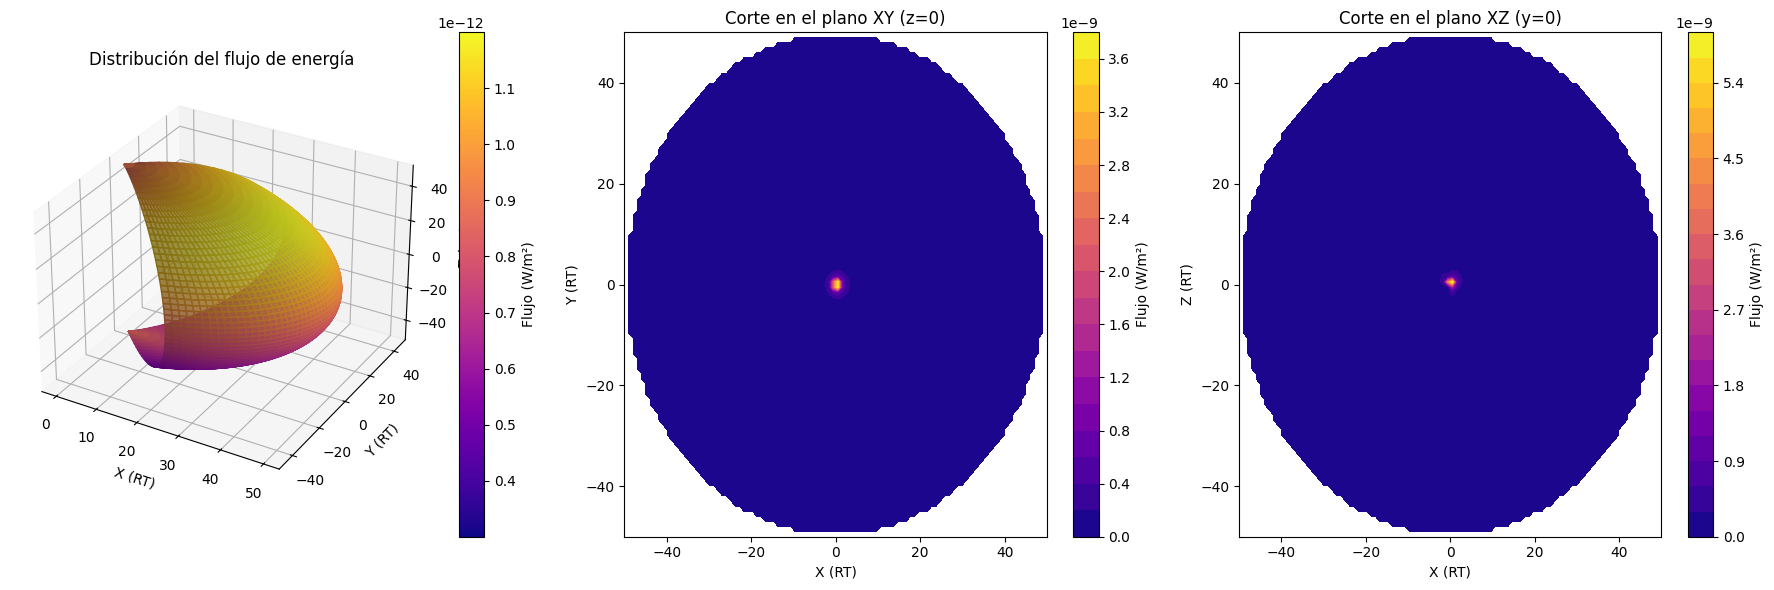

In [9]:
import numpy as np
from numpy import sqrt, arctan2, cos, sin, pi
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Función de flujo de energía CORREGIDA
def flujo_energia(x, y, z):
    r = sqrt(x**2 + y**2 + z**2)
    theta = np.zeros_like(r)
    nonzero_mask = r > 0
    theta[nonzero_mask] = np.arccos(z[nonzero_mask]/r[nonzero_mask])
    phi = arctan2(y, x)
    flujo = np.zeros_like(r)
    flujo[nonzero_mask] = (1.5 + np.sin(2*theta[nonzero_mask]) + 0.5*np.cos(phi[nonzero_mask])) / r[nonzero_mask]**2
    return 1e-9 * flujo

# Límites para un sector esférico
def y_ms(x):
    return np.where(abs(x) <= 40, sqrt(50**2 - x**2), sqrt(50**2 - 40**2))

def z_ms(x, y):
    r_xy = sqrt(x**2 + y**2)
    return np.where(r_xy <= 50, sqrt(50**2 - r_xy**2), 0)

# Visualización
fig = plt.figure(figsize=(18, 6))

# 1. Visualización 3D esférica
ax1 = fig.add_subplot(131, projection='3d')

# Crear esfera
u = np.linspace(-np.pi/3, np.pi/3, 60)
v = np.linspace(0, np.pi, 60)
U, V = np.meshgrid(u, v)
X = 50 * np.cos(U) * np.sin(V)
Y = 50 * np.sin(U) * np.sin(V)
Z = 50 * np.cos(V)

# Calcular flujo
F = flujo_energia(X, Y, Z)

# Graficar superficie coloreada
surf = ax1.plot_surface(X, Y, Z, facecolors=plt.cm.plasma(F/np.max(F)), 
                       rstride=1, cstride=1, alpha=0.8)
ax1.set_title('Distribución del flujo de energía')
ax1.set_xlabel('X (RT)')
ax1.set_ylabel('Y (RT)')
ax1.set_zlabel('Z (RT)')

# Barra de color
mappable = plt.cm.ScalarMappable(cmap='plasma')
mappable.set_array(F)
fig.colorbar(mappable, ax=ax1, label='Flujo (W/m²)')

# 2. Mapa 2D en plano XY
ax2 = fig.add_subplot(132)
x = np.linspace(-50, 50, 100)
y = np.linspace(-50, 50, 100)
X, Y = np.meshgrid(x, y)
Z = np.zeros_like(X)
F_xy = flujo_energia(X, Y, Z)

# Aplicar máscara para la región de integración
mask = (X**2 + Y**2) > 50**2
F_masked = np.ma.masked_where(mask, F_xy)

contour = ax2.contourf(X, Y, F_masked, levels=20, cmap='plasma')
plt.colorbar(contour, label='Flujo (W/m²)')
ax2.set_title('Corte en el plano XY (z=0)')
ax2.set_xlabel('X (RT)')
ax2.set_ylabel('Y (RT)')

# 3. Mapa 2D en plano XZ
ax3 = fig.add_subplot(133)
x = np.linspace(-50, 50, 100)
z = np.linspace(-50, 50, 100)
X, Z = np.meshgrid(x, z)
Y = np.zeros_like(X)
F_xz = flujo_energia(X, Y, Z)

# Aplicar máscara
mask = (X**2 + Z**2) > 50**2
F_masked = np.ma.masked_where(mask, F_xz)

contour = ax3.contourf(X, Z, F_masked, levels=20, cmap='plasma')
plt.colorbar(contour, label='Flujo (W/m²)')
ax3.set_title('Corte en el plano XZ (y=0)')
ax3.set_xlabel('X (RT)')
ax3.set_ylabel('Z (RT)')

plt.tight_layout()
plt.show()